In [5]:
%load_ext autoreload
%autoreload 2
import numpy as np
import os
import matplotlib.pyplot as plt
from configs.RecursiveVPSDE.Markovian_8DLorenz.recursive_Markovian_PostMeanScore_8DLorenz_Chaos_T256_H05_tl_110data_StbleTgt import get_config

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [6]:
config = get_config()
num_paths = 1024 if config.feat_thresh == 1. else 10240
assert num_paths == 1024
root_dir = "/Users/marcos/Library/CloudStorage/OneDrive-ImperialCollegeLondon/StatML_CDT/Year2/DiffusionModels/"

In [7]:
def get_drift_files(config, root_dir ):
    ts_type = f"{config.ndims}DLnz"
    include = (f"_{num_paths}NPaths_{config.t0}t0_{config.deltaT:.3e}dT_").replace(".", "")
    root_nadaraya_dir = root_dir + f"ExperimentResults/Nadaraya/8DLnzChaosLessData/"
    true_files = []
    local_files = []
    for file in os.listdir(root_nadaraya_dir):
        if "IIDNadaraya" in file and ts_type in file and include in file and ((f"{config.forcing_const}FConst").replace(".","") in file):
            if "true" in file:
                true_files.append(root_nadaraya_dir+file)
            elif "global" in file:
                local_files.append(root_nadaraya_dir+file)
    assert len(true_files)>0, "No true files found"
    assert len(local_files)>0, "No local files found"
    assert (len(true_files) == len(local_files))
    def extract_bw_number(s):
        match = s.split("/")[-1].split("_")[3][:-2]
        return float("0." + match)
    true_files = sorted(true_files, key=extract_bw_number)
    local_files = sorted(local_files, key=extract_bw_number)
    bws = [extract_bw_number(f) for f in true_files]
    return true_files, local_files, bws

In [8]:
config = get_config()
true_files, local_files, bws = get_drift_files(config=config, root_dir=root_dir)
local_files

['/Users/marcos/Library/CloudStorage/OneDrive-ImperialCollegeLondon/StatML_CDT/Year2/DiffusionModels/ExperimentResults/Nadaraya/8DLnzChaosLessData/IIDNadaraya_f8DLnz_DriftTrack_0007912bw_1024NPaths_00t0_3906e-03dT_125FConst_global_states.npy',
 '/Users/marcos/Library/CloudStorage/OneDrive-ImperialCollegeLondon/StatML_CDT/Year2/DiffusionModels/ExperimentResults/Nadaraya/8DLnzChaosLessData/IIDNadaraya_f8DLnz_DriftTrack_0010446bw_1024NPaths_00t0_3906e-03dT_125FConst_global_states.npy',
 '/Users/marcos/Library/CloudStorage/OneDrive-ImperialCollegeLondon/StatML_CDT/Year2/DiffusionModels/ExperimentResults/Nadaraya/8DLnzChaosLessData/IIDNadaraya_f8DLnz_DriftTrack_0013793bw_1024NPaths_00t0_3906e-03dT_125FConst_global_states.npy',
 '/Users/marcos/Library/CloudStorage/OneDrive-ImperialCollegeLondon/StatML_CDT/Year2/DiffusionModels/ExperimentResults/Nadaraya/8DLnzChaosLessData/IIDNadaraya_f8DLnz_DriftTrack_0018211bw_1024NPaths_00t0_3906e-03dT_125FConst_global_states.npy',
 '/Users/marcos/Library/

13.7393327665057 0.0007912 inf


/var/folders/68/vrxg2n311sz1gs264pkys2zh0000gn/T/ipykernel_35468/1785876916.py:13: RuntimeWarning: invalid value encountered in divide
  total_local_errors = np.sqrt(np.mean(all_global_errors, axis=(0)))/np.sqrt(time_steps)
/var/folders/68/vrxg2n311sz1gs264pkys2zh0000gn/T/ipykernel_35468/1785876916.py:14: RuntimeWarning: invalid value encountered in divide
  all_paths_err = np.sqrt(all_global_errors)/np.sqrt(time_steps)


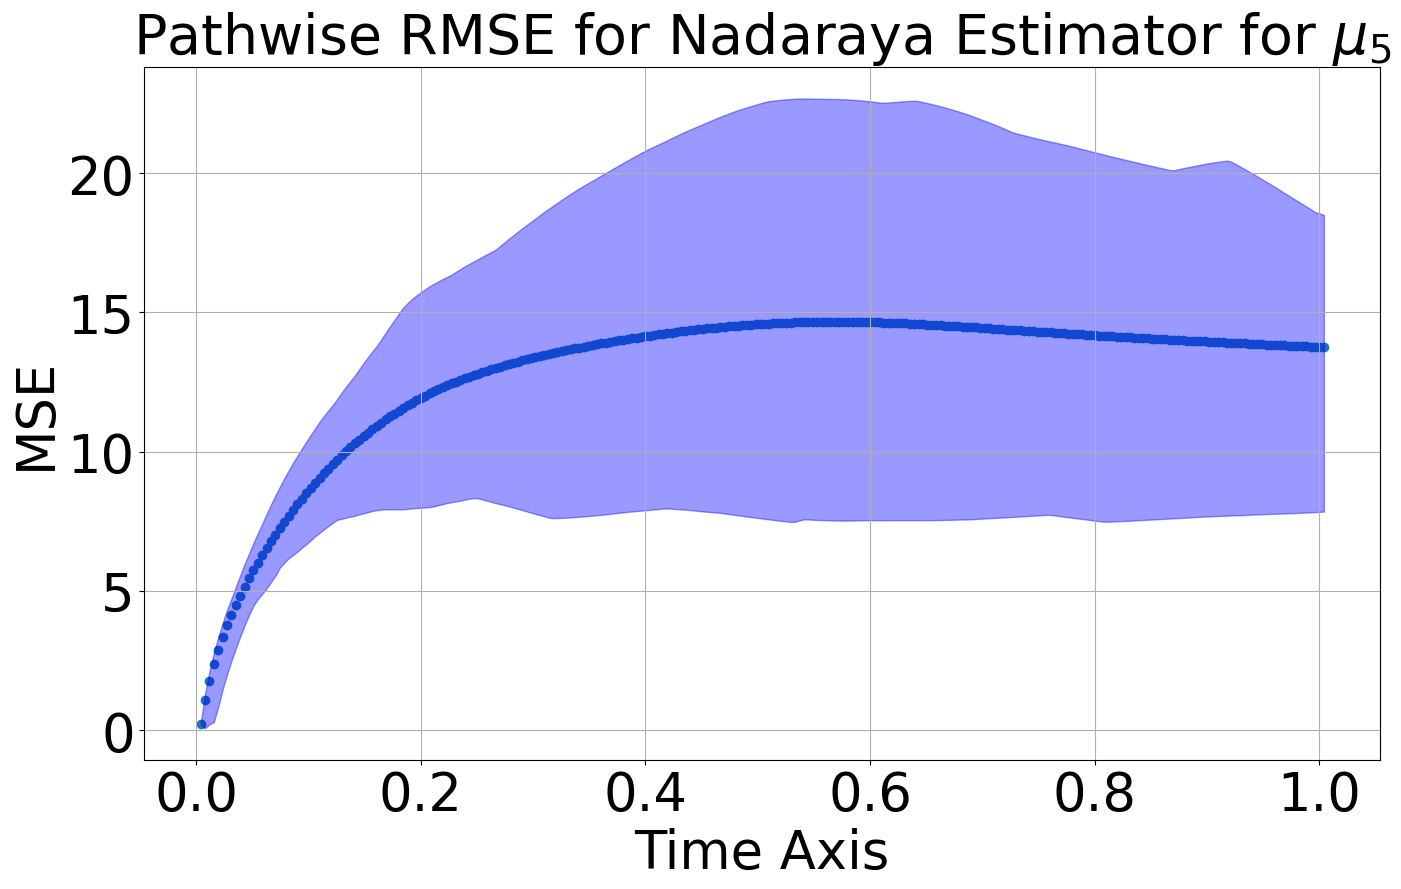

Final time cumulative MSE local-time error 13.7393327665057 with IQR ((7.842466784558583, 18.49754046914933))at bw 0.0007912 for 1.25FConst

13.709501217675582 0.0010446 13.7393327665057


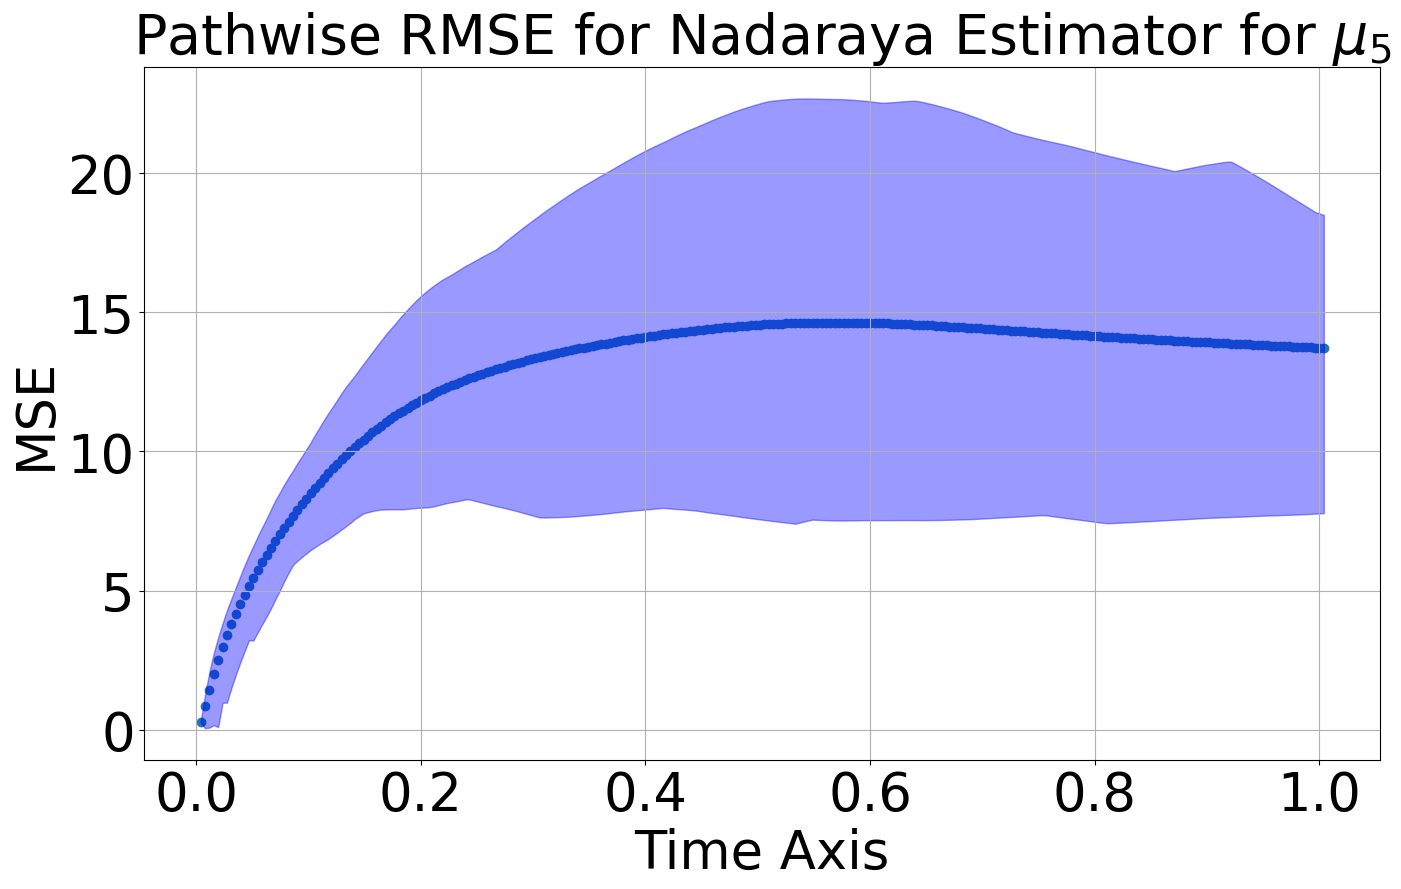

Final time cumulative MSE local-time error 13.709501217675582 with IQR ((7.782152771144796, 18.496147374855312))at bw 0.0010446 for 1.25FConst

13.658444610649282 0.0013793 13.709501217675582


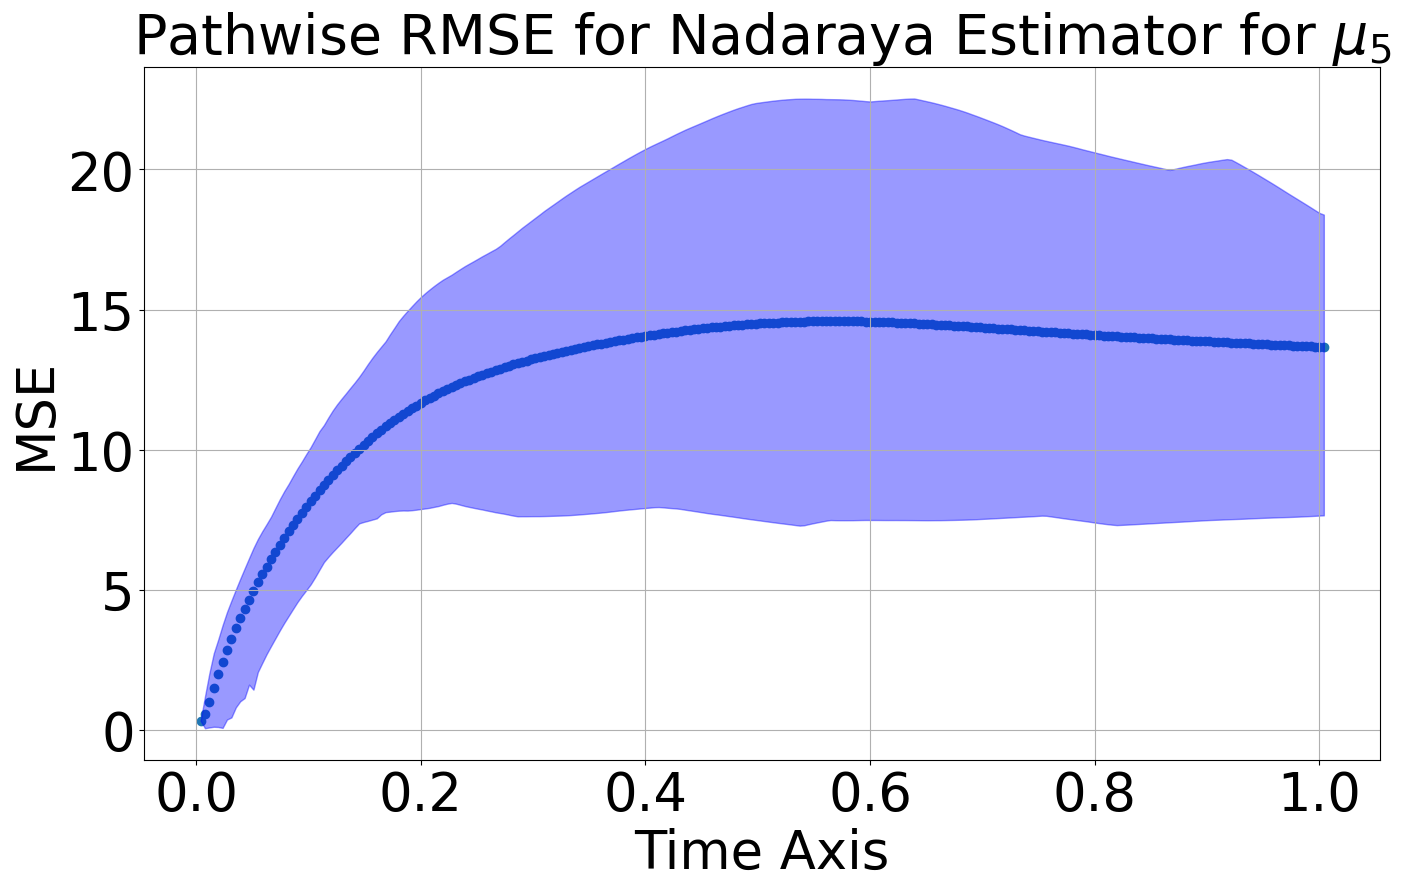

Final time cumulative MSE local-time error 13.658444610649282 with IQR ((7.656802137750639, 18.38559593148186))at bw 0.0013793 for 1.25FConst

13.561364851042216 0.0018211 13.658444610649282


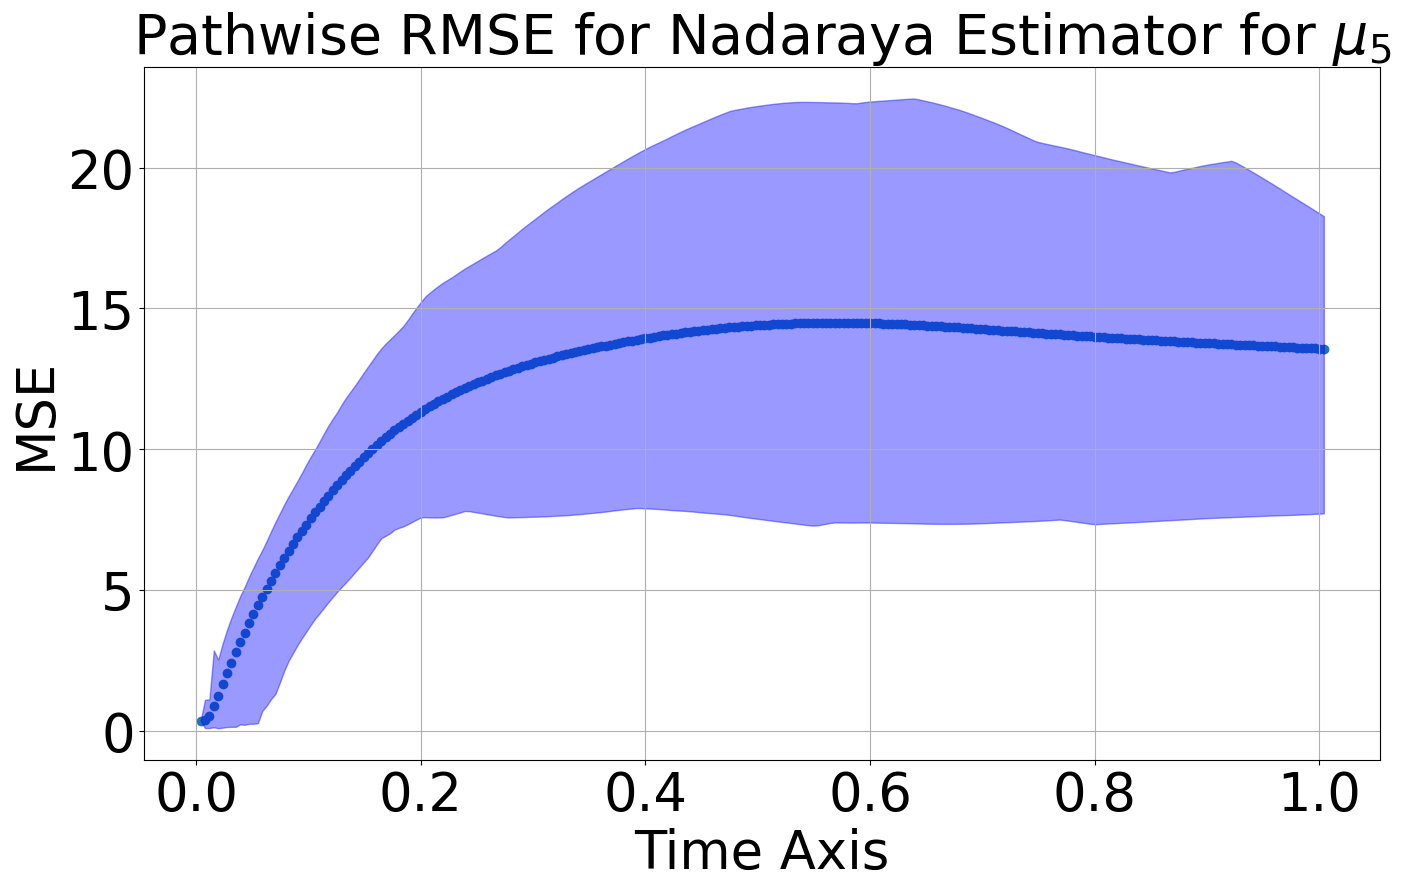

Final time cumulative MSE local-time error 13.561364851042216 with IQR ((7.714817963083246, 18.274734109944195))at bw 0.0018211 for 1.25FConst

13.38702796467912 0.0024046 13.561364851042216


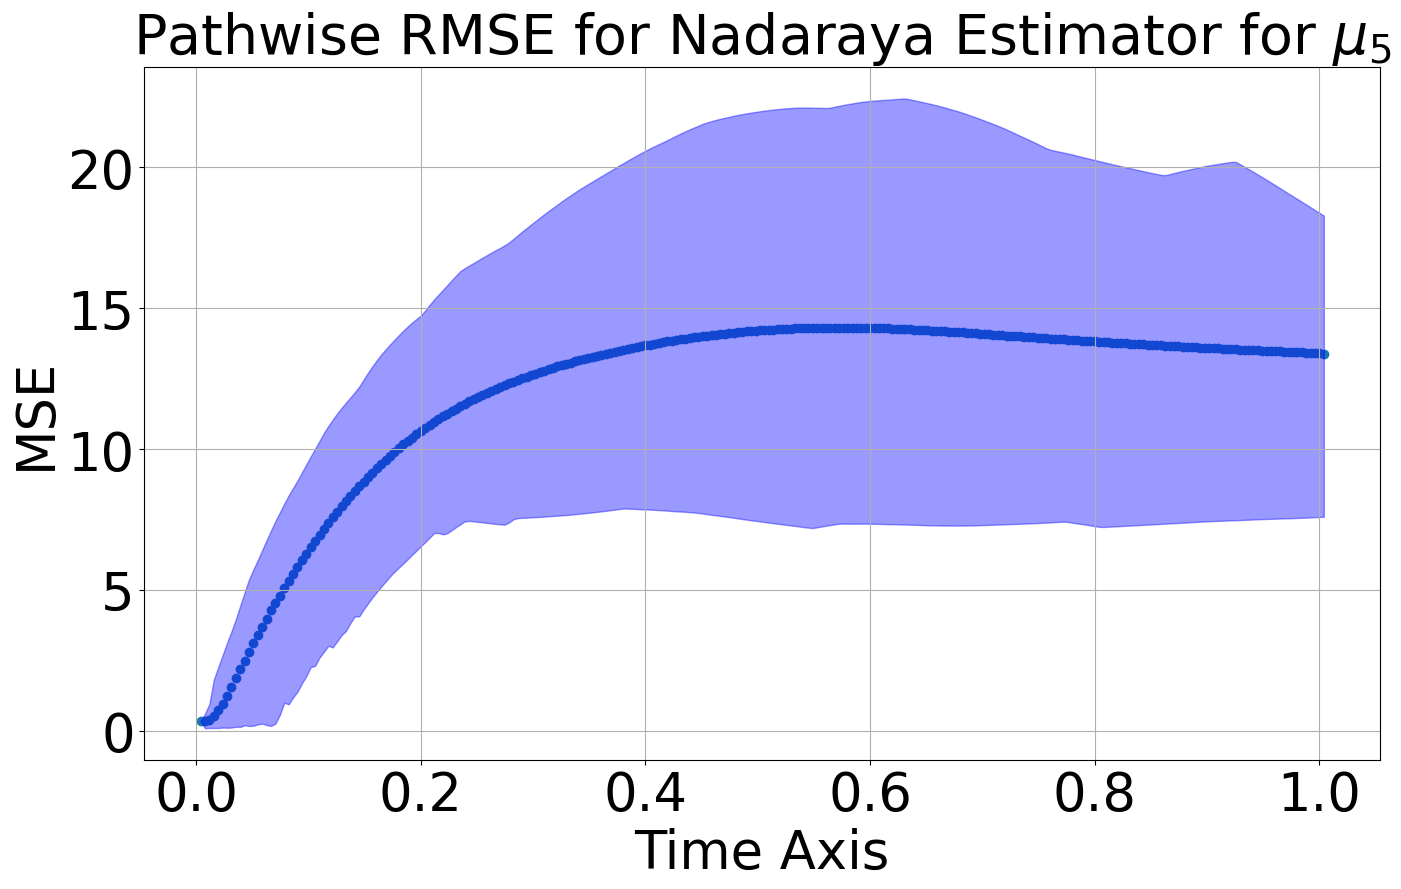

Final time cumulative MSE local-time error 13.38702796467912 with IQR ((7.595602763737449, 18.282100867411568))at bw 0.0024046 for 1.25FConst

13.019442598571896 0.0031749 13.38702796467912


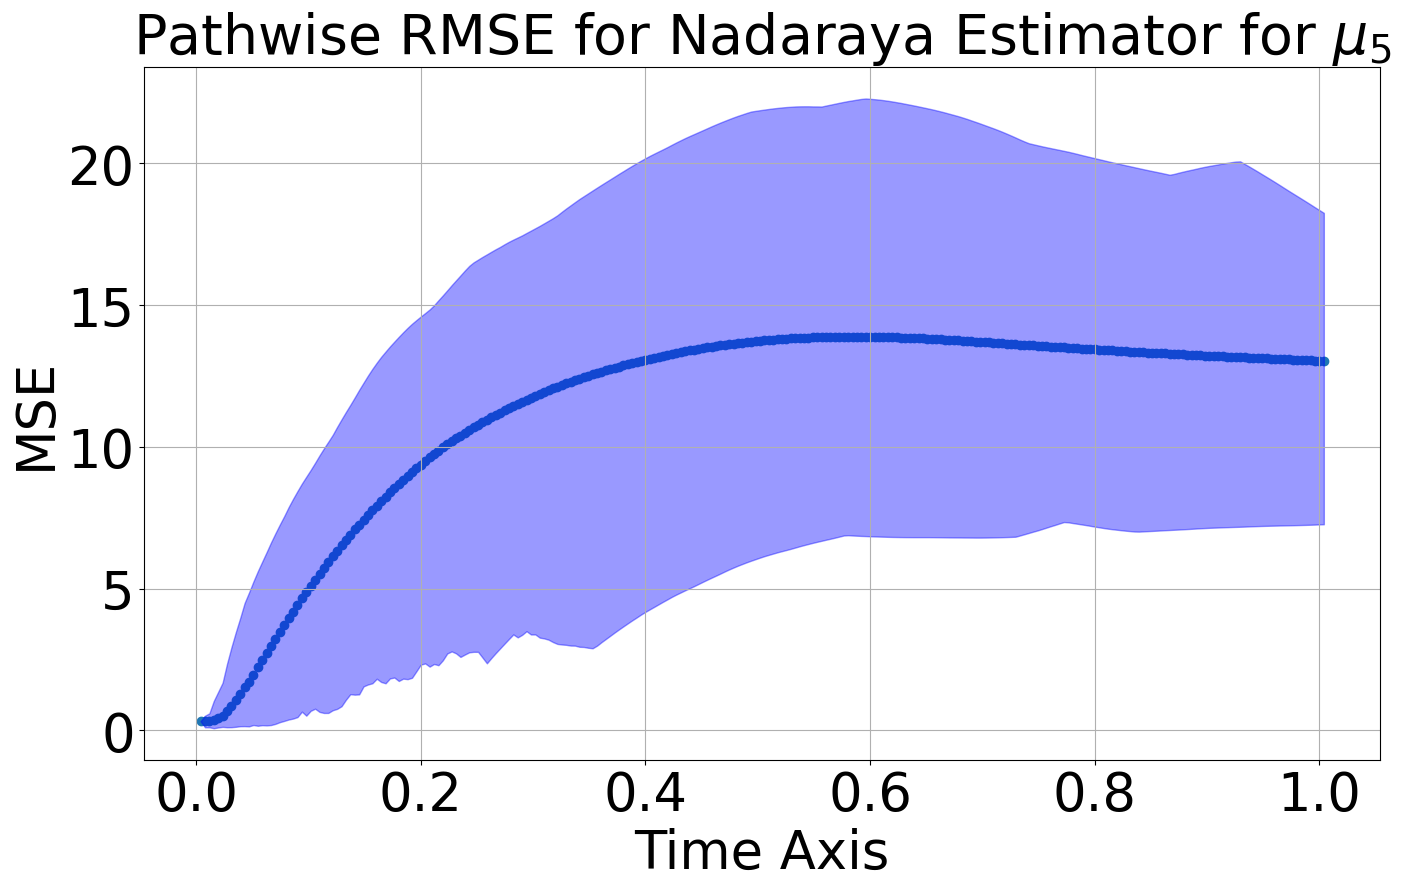

Final time cumulative MSE local-time error 13.019442598571896 with IQR ((7.267194880675145, 18.245667627405737))at bw 0.0031749 for 1.25FConst

12.36080459679307 0.0041919 13.019442598571896


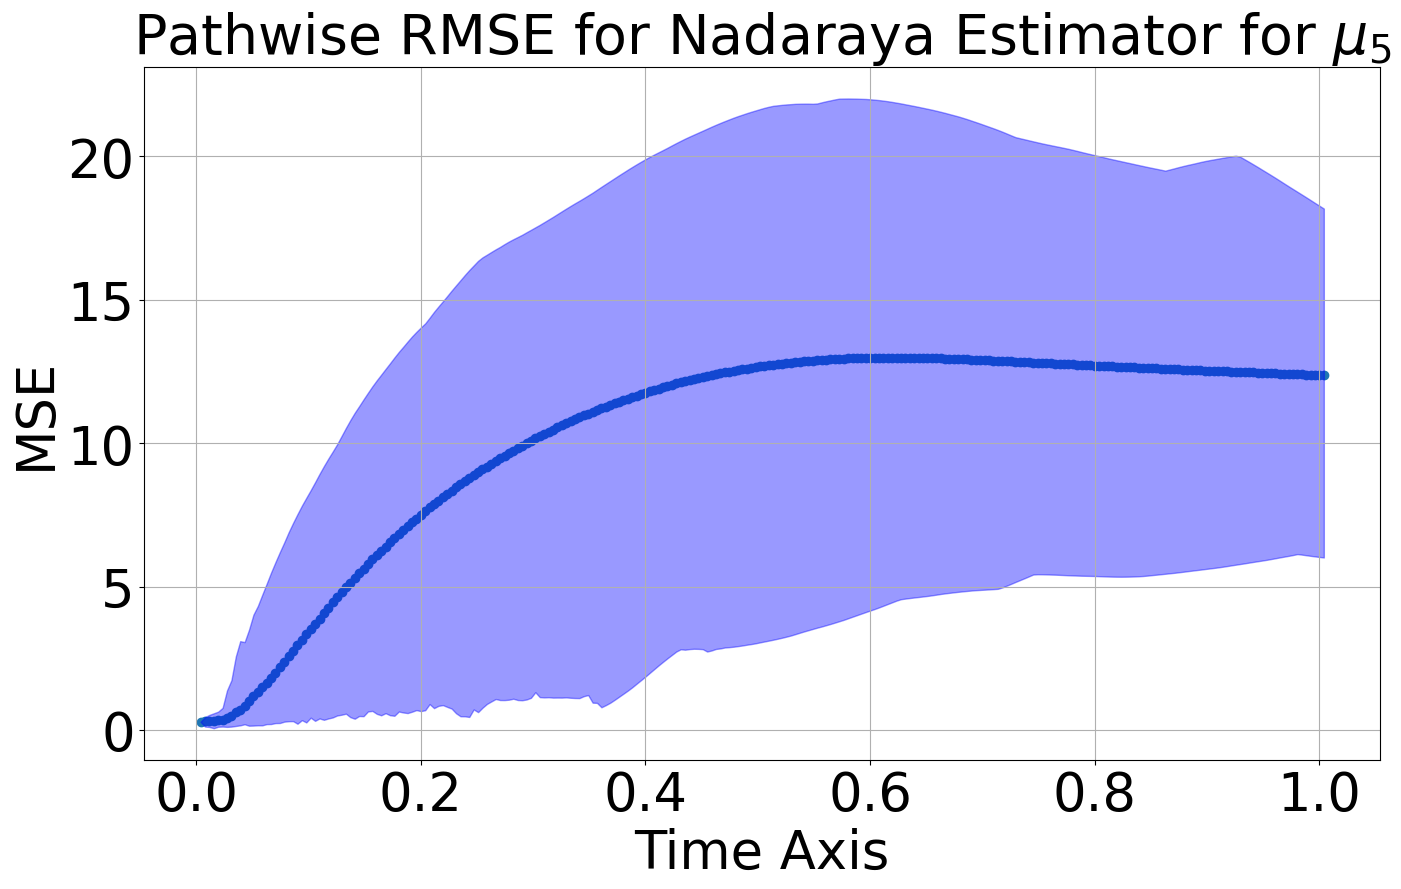

Final time cumulative MSE local-time error 12.36080459679307 with IQR ((6.012591644565062, 18.17981205948386))at bw 0.0041919 for 1.25FConst

11.18739596289448 0.0055348 12.36080459679307


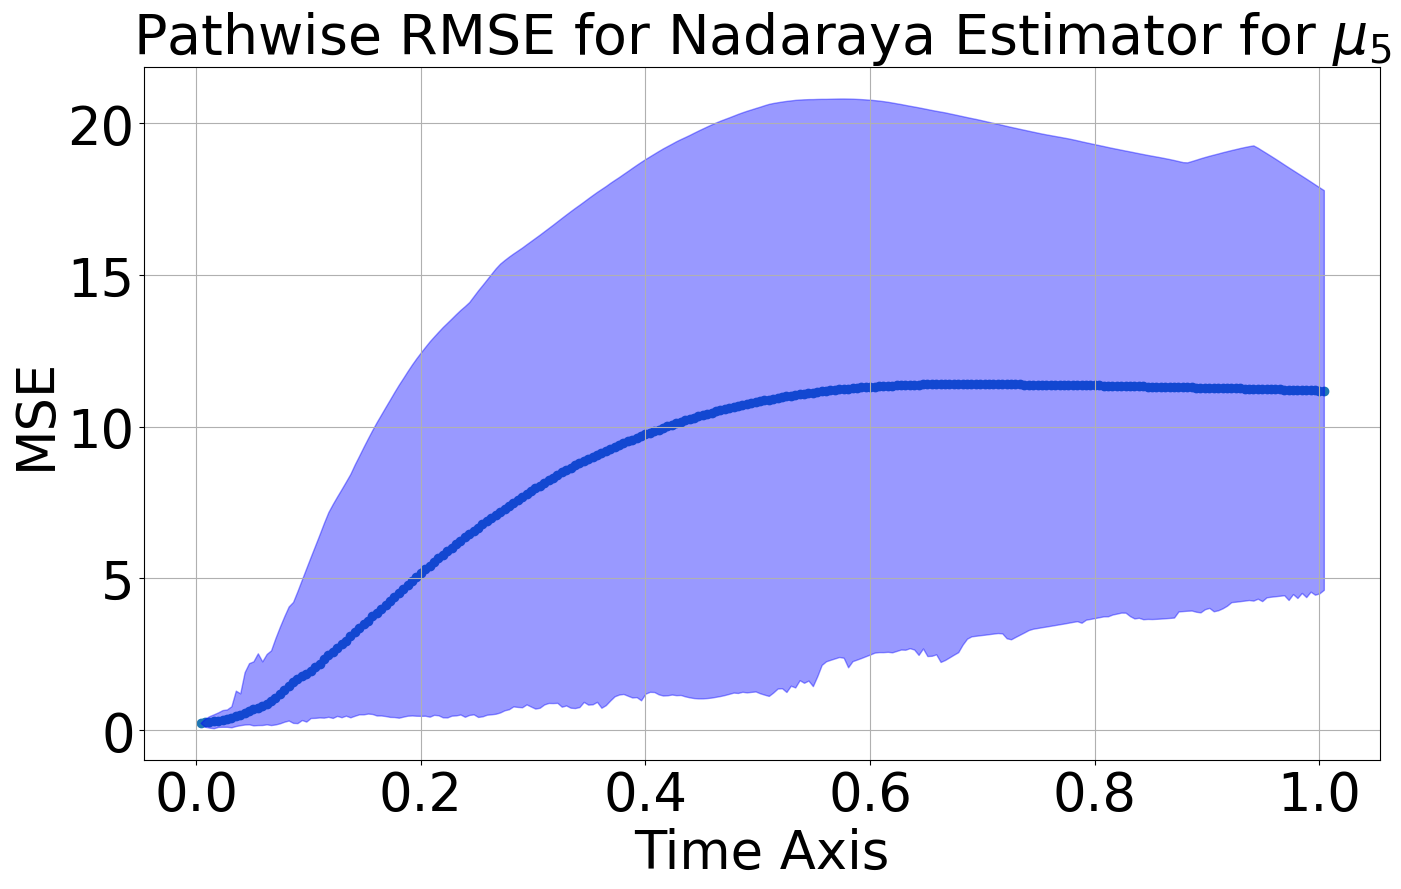

Final time cumulative MSE local-time error 11.18739596289448 with IQR ((4.62448346585829, 17.792918782261893))at bw 0.0055348 for 1.25FConst

9.588897619511018 0.0073079 11.18739596289448


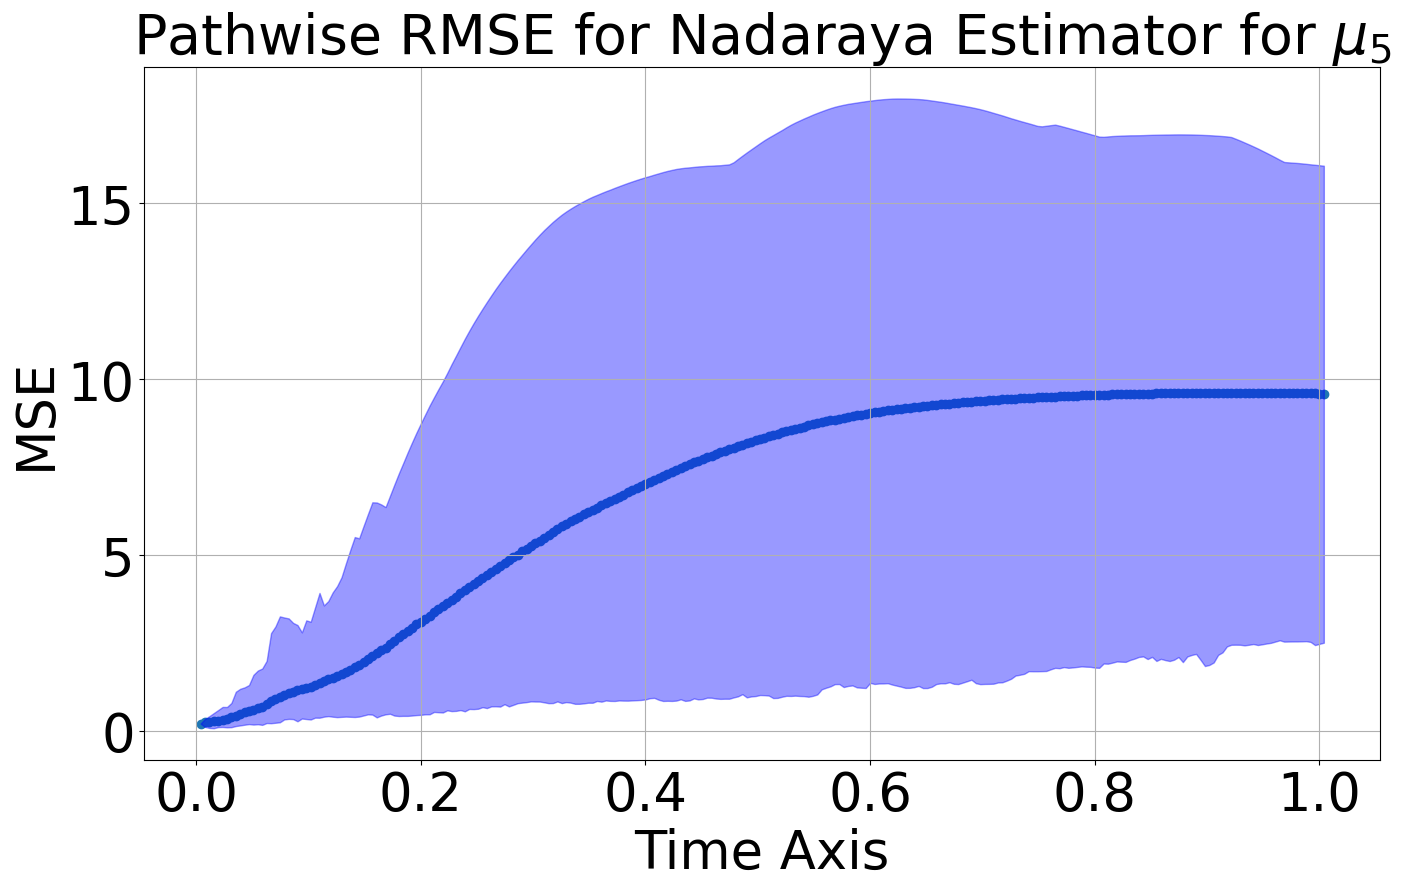

Final time cumulative MSE local-time error 9.588897619511018 with IQR ((2.506015834737419, 16.07089163546593))at bw 0.0073079 for 1.25FConst

7.725469019666247 0.009649 9.588897619511018


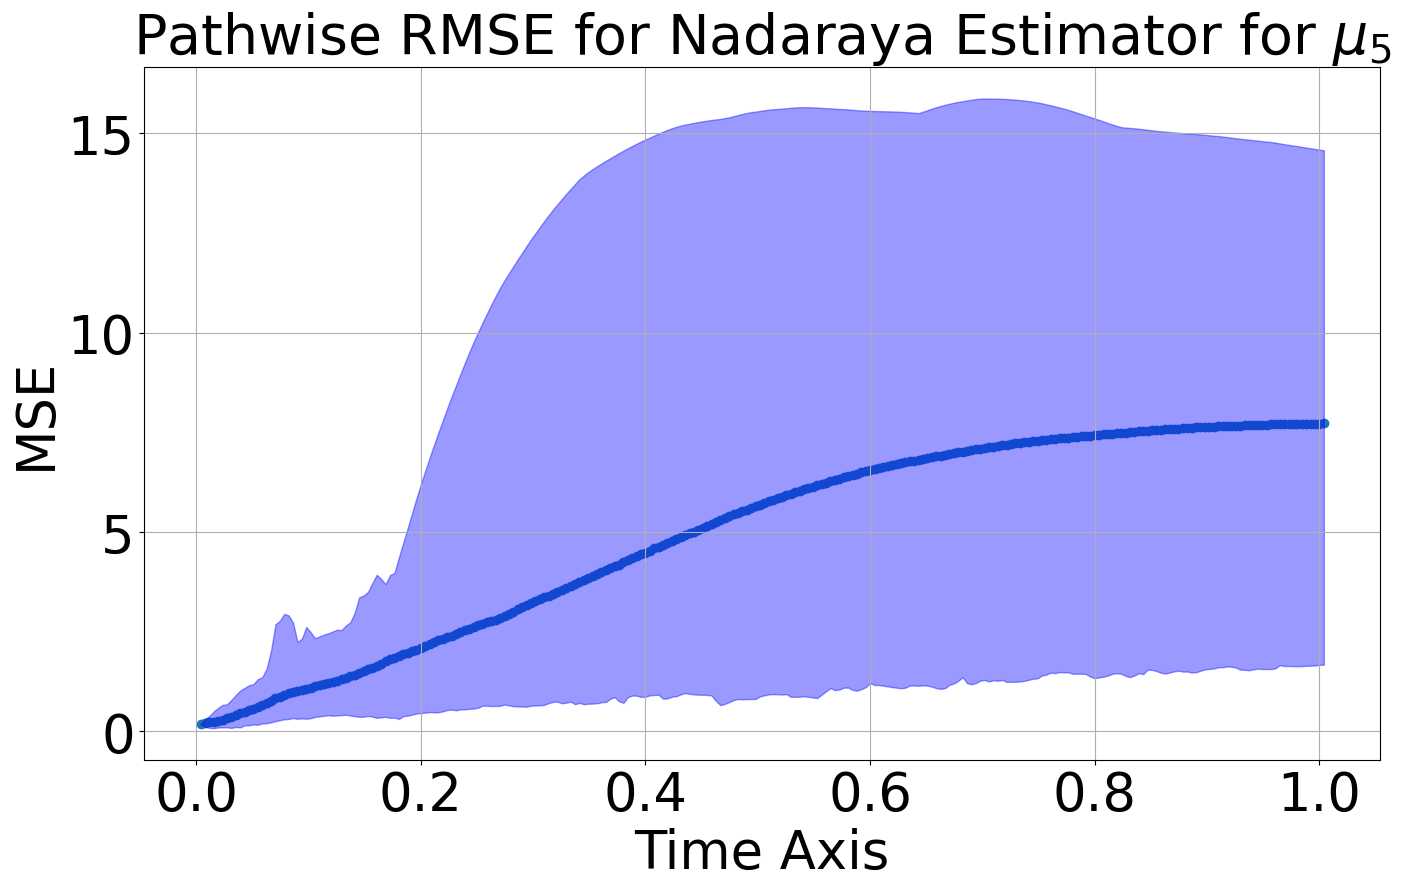

Final time cumulative MSE local-time error 7.725469019666247 with IQR ((1.6741305377527747, 14.576503065313473))at bw 0.009649 for 1.25FConst

6.26163340519472 0.0127401 7.725469019666247


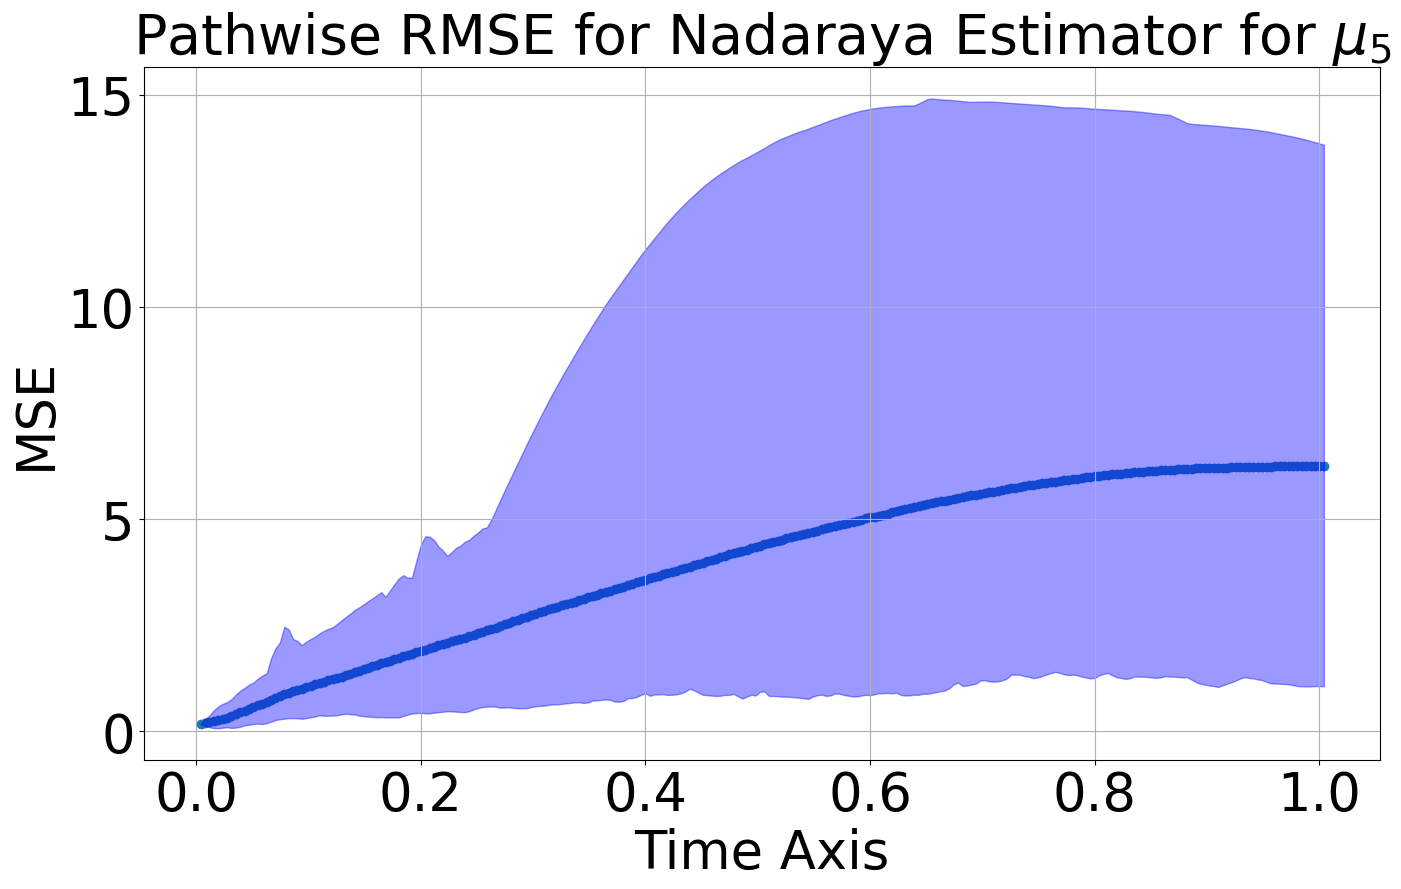

Final time cumulative MSE local-time error 6.26163340519472 with IQR ((1.059953532665717, 13.821273997874881))at bw 0.0127401 for 1.25FConst

5.351030775484145 0.0168214 6.26163340519472


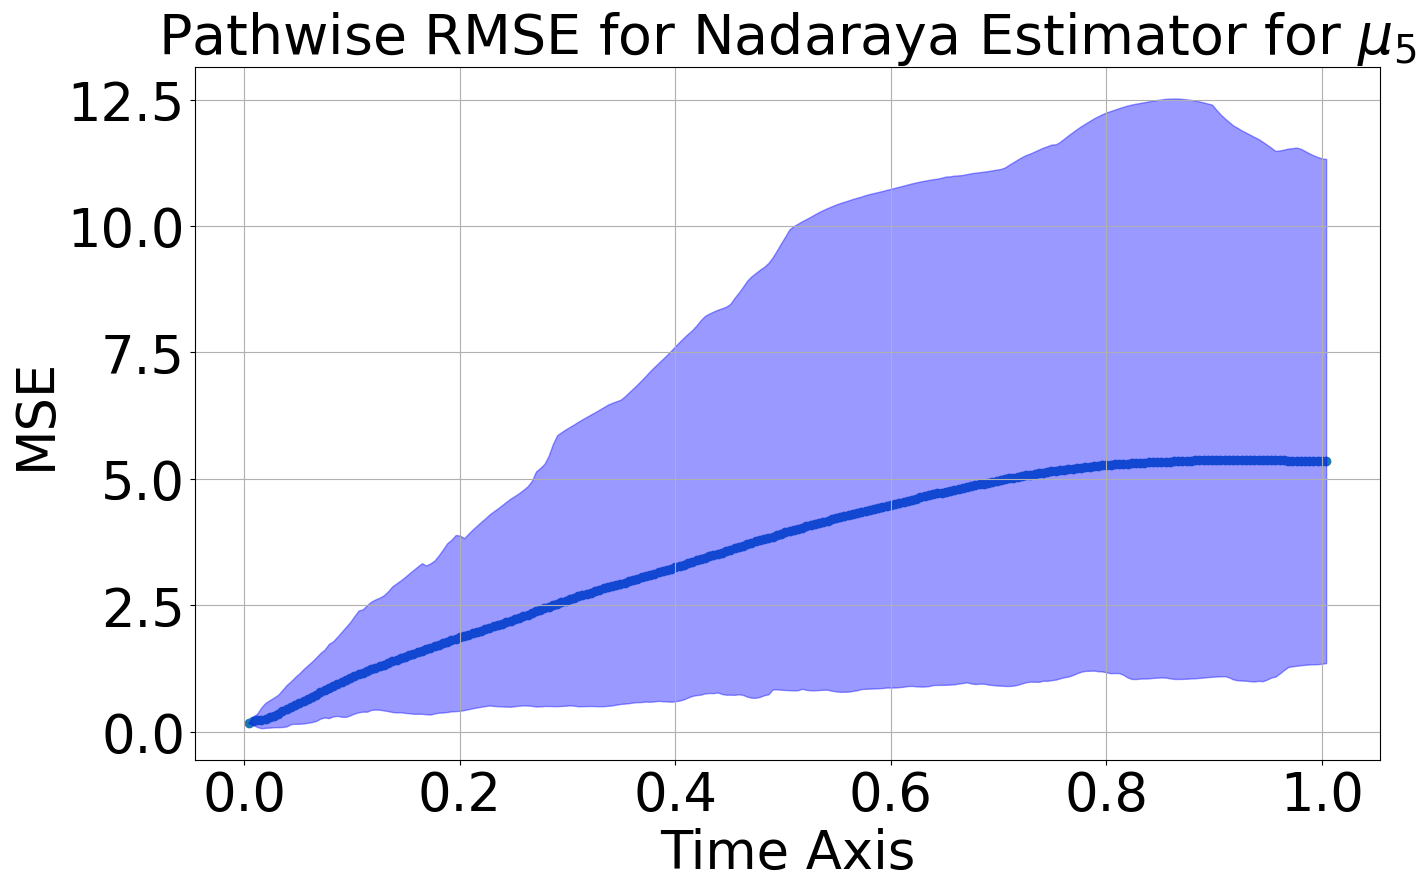

Final time cumulative MSE local-time error 5.351030775484145 with IQR ((1.3564159146400239, 11.325952768661192))at bw 0.0168214 for 1.25FConst

4.9500314110595545 0.0222102 5.351030775484145


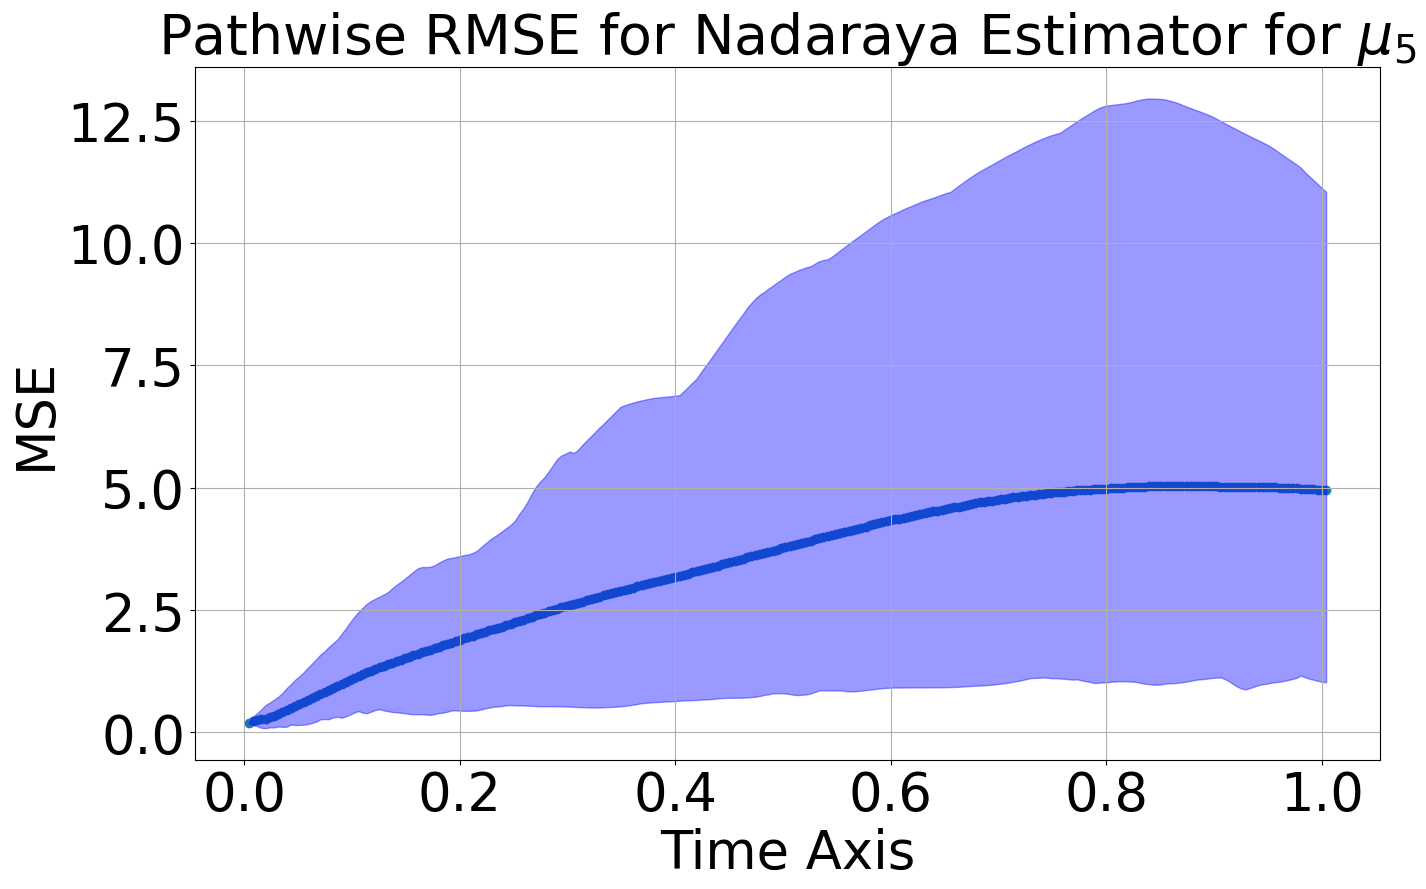

Final time cumulative MSE local-time error 4.9500314110595545 with IQR ((1.0242191803491298, 11.043319569296804))at bw 0.0222102 for 1.25FConst

4.95094724608725 0.0293252 4.9500314110595545
4.988146145865683 0.0387196 4.9500314110595545
5.03229101083387 0.0511235 4.9500314110595545
5.099858635067133 0.067501 4.9500314110595545
5.177334455965195 0.0891251 4.9500314110595545


In [9]:
curr_rmse = np.inf
toSave = False
i = 0
for file in zip(*[true_files, local_files, bws]):
    bw = file[-1]
    all_true_states = np.load(file[0])
    all_local_states = np.load(file[1])
    if all_local_states.shape[0] != 2: continue
    if (len(all_true_states.shape) == len(all_local_states.shape) == 4):
        time_steps = np.linspace(config.t0,config.deltaT*all_true_states.shape[2],all_true_states.shape[2])
        all_global_errors = np.sum(np.power(all_true_states- all_local_states,2), axis=-1)
        all_global_errors=all_global_errors.reshape(-1, all_global_errors.shape[-1])            # (K, N, T)
        total_local_errors = np.sqrt(np.mean(all_global_errors, axis=(0)))/np.sqrt(time_steps)
        all_paths_err = np.sqrt(all_global_errors)/np.sqrt(time_steps)
        total_local_errors[total_local_errors==np.inf] = 0.
        all_paths_err[all_paths_err==np.inf] = 0.
        total_local_errors_minq, total_local_errors_maxq  = np.quantile(all_paths_err, q=[0.005, 0.995], axis=0) # (T,)
        print(total_local_errors[-1], bw, curr_rmse)
        i += 1
        if total_local_errors[-1]  < curr_rmse:
            curr_rmse = total_local_errors[-1]
            fig, ax = plt.subplots(figsize=(14,9))
            plt.grid(True)
            ax.scatter(time_steps, total_local_errors)
            plt.fill_between(time_steps,y1=total_local_errors_minq, y2=total_local_errors_maxq, color="blue", alpha=0.4)
            ax.set_title(rf"Pathwise RMSE for Nadaraya Estimator for $\mu_5$",fontsize=40)
            ax.set_ylabel("MSE", fontsize=38)
            ax.set_xlabel("Time Axis", fontsize=38)
            ax.tick_params(labelsize=38)
            plt.tight_layout()
            if toSave:
                plt.savefig((root_dir + f"DiffusionModelPresentationImages/IIDNadaraya/8DLnzChaosLessData/IIDNadaraya_{config.ndims}DLnz_DriftTrack_{round(bw, 6)}bw_{config.forcing_const}FConst_{config.forcing_const}FConst_{round(total_local_errors_minq[-1], 8)}_MinIQR_{round(total_local_errors[-1], 8)}MeanIQR_{round(total_local_errors_maxq[-1], 8)}_MaxIQR").replace(".", "")+".png")
            plt.show()
            plt.close()
            print(f"Final time cumulative MSE local-time error {total_local_errors[-1]} with IQR ({total_local_errors_minq[-1], total_local_errors_maxq[-1]})at bw {bw} for {config.forcing_const}FConst\n")

In [10]:
from utils.resource_logger import wallclock_and_system_metrics
data = wallclock_and_system_metrics(config.nadaraya_resource_logging_path, inclusive=False)
data

{'progress_name': 'idx',
 'span_units': 12.0,
 'wall_clock_h_total': 4.634114331934187,
 'wall_clock_per_unit_h': 0.38617619432784894,
 'cpu_avg_pct': 1.443571428571428,
 'cpu_peak_pct': 1.6,
 'ram_avg_gib': 115.47136048571429,
 'ram_peak_gib': 121.910308,
 'gpu_util_avg_pct': None,
 'gpu_util_peak_pct': None,
 'gpu_mem_avg_gib': None,
 'gpu_mem_peak_gib': None}